<a href="https://colab.research.google.com/github/kwakpovwe/kwakpovwe/blob/main/Peter_Twitter_Sentiment_Analysis_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_md


     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     ---------------------------------------- 0.2/42.8 MB 7.6 MB/s eta 0:00:06
      --------------------------------------- 0.5/42.8 MB 6.8 MB/s eta 0:00:07
      --------------------------------------- 0.8/42.8 MB 6.7 MB/s eta 0:00:07
     - -------------------------------------- 1.1/42.8 MB 6.6 MB/s eta 0:00:07
     - -------------------------------------- 1.5/42.8 MB 6.6 MB/s eta 0:00:07
     - -------------------------------------- 1.7/42.8 MB 6.5 MB/s eta 0:00:07
     - -------------------------------------- 2.0/42.8 MB 6.5 MB/s eta 0:00:07
     -- ------------------------------------- 2.4/42.8 MB 6.8 MB/s eta 0:00:06
     -- ------------------------------------- 2.6/42.8 MB 6.6 MB/s eta 0:00:07
     -- ------------------------------------- 2.9/42.8 MB 6.6 MB/s eta 0:00:07
     -- ------------------------------------- 3.2/42.8 MB 6.6 MB/s eta 0:00:06
     --- ------------------------------------ 3.5/42.8 MB 6

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import spacy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import SMOTE

# Load the dataset with a different encoding
Appledf = pd.read_csv('Apple-Twitter-Sentiment.csv', encoding='latin-1')

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Assuming Appledf is a DataFrame with a column named 'text'
# If 'text' is already a list of tokens, you should convert it to a string first

# Convert the list of tokens to a string
Appledf['text'] = Appledf['text'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)

# Check the data type of the 'text' column
print("Data Type of 'text' column:", Appledf['text'].dtype)

# Text cleaning
Appledf['text'] = Appledf['text'].str.replace('[^a-zA-Z]', ' ')
Appledf['text'] = Appledf['text'].str.lower()

# Tokenization
Appledf['text'] = Appledf['text'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else x)

# Stopword removal
stop_words = set(stopwords.words('english'))
Appledf['text'] = Appledf['text'].apply(lambda x: [word for word in x if word.lower() not in stop_words] if isinstance(x, list) else x)


Data Type of 'text' column: object


C:\Users\Dell\AppData\Local\Temp\ipykernel_4864\2261410699.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  Appledf['text'] = Appledf['text'].str.replace('[^a-zA-Z]', ' ')


In [ ]:
# Embedding using spaCy
nlp = spacy.load("en_core_web_md")


In [ ]:
# Combine word embeddings for each sentence to form a fixed-length vector representation
Appledf['Sentence_Embedding'] = Appledf['text'].apply(lambda x: np.mean([nlp(word).vector for word in x], axis=0))

In [ ]:
Appledf

,_unit_id,date,_trusted_judgments,text,sentiment,sentiment_confidence,Sentence_Embedding
0,623495513,Mon Dec 01 19:30:03 +0000 2014,10,"[aapl, best, steve, jobs, emails, ever, http, ...",3,0.6264,"[0.20880727, -0.52001363, -1.8062545, 0.747515..."
1,623495514,Mon Dec 01 19:43:51 +0000 2014,12,"[rt, jpdesloges, aapl, stock, mini, flash, cra...",3,0.8129,"[0.4157486, 1.2411429, 1.28815, 1.2783443, 0.6..."
2,623495515,Mon Dec 01 19:50:28 +0000 2014,10,"[cat, chews, apple, cords, applesnob]",3,1.0000,"[0.48554, 1.5676601, -1.7192099, -1.7409598, -..."
3,623495516,Mon Dec 01 20:26:34 +0000 2014,17,"[agree, jimcramer, individualinvestor, trade, ...",3,0.5848,"[-0.3259518, 0.0087554455, -0.48292828, 0.0927..."
4,623495517,Mon Dec 01 20:29:33 +0000 2014,3,"[nobody, expects, spanish, inquisition, aapl]",3,0.6474,"[-0.20038, 0.59162796, 0.701572, 0.7456748, 1...."
...,...,...,...,...,...,...,...
3881,623499442,Tue Dec 09 22:08:53 +0000 2014,13,"[via, fc, apple, warming, social, media, apple...",3,0.7757,"[-0.11390372, 0.64547217, -0.42312887, 1.35234..."
3882,623499450,Tue Dec 09 22:18:27 +0000 2014,16,"[rt, mmlxiv, avocado, emoji, may, ask, apple]",3,0.6225,"[1.3398, 2.1238809, -0.5330614, -1.0294214, -0..."
3883,623499486,Tue Dec 09 23:45:59 +0000 2014,14,"[marcbulandr, could, agree, apple, twitter, ib...",5,0.9347,"[0.617549, 0.42975998, -1.4980354, -1.12154, 0..."
3884,623499514,Wed Dec 10 00:48:10 +0000 2014,13,"[iphone, photos, longer, downloading, automati...",1,0.9230,"[0.17866364, 0.87594414, -2.1830218, 0.3526372..."


In [ ]:
# Encoding Categorical Variables

import pandas as pd
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
Appledf['sentiment'] = label_encoder.fit_transform(Appledf['sentiment'])
print("\nEncoded DataFrame:")
display(Appledf.head())


Encoded DataFrame:


,_unit_id,date,_trusted_judgments,text,sentiment,sentiment_confidence,Sentence_Embedding
0,623495513,Mon Dec 01 19:30:03 +0000 2014,10,"[aapl, best, steve, jobs, emails, ever, http, ...",1,0.6264,"[0.20880727, -0.52001363, -1.8062545, 0.747515..."
1,623495514,Mon Dec 01 19:43:51 +0000 2014,12,"[rt, jpdesloges, aapl, stock, mini, flash, cra...",1,0.8129,"[0.4157486, 1.2411429, 1.28815, 1.2783443, 0.6..."
2,623495515,Mon Dec 01 19:50:28 +0000 2014,10,"[cat, chews, apple, cords, applesnob]",1,1.0000,"[0.48554, 1.5676601, -1.7192099, -1.7409598, -..."
3,623495516,Mon Dec 01 20:26:34 +0000 2014,17,"[agree, jimcramer, individualinvestor, trade, ...",1,0.5848,"[-0.3259518, 0.0087554455, -0.48292828, 0.0927..."
4,623495517,Mon Dec 01 20:29:33 +0000 2014,3,"[nobody, expects, spanish, inquisition, aapl]",1,0.6474,"[-0.20038, 0.59162796, 0.701572, 0.7456748, 1...."


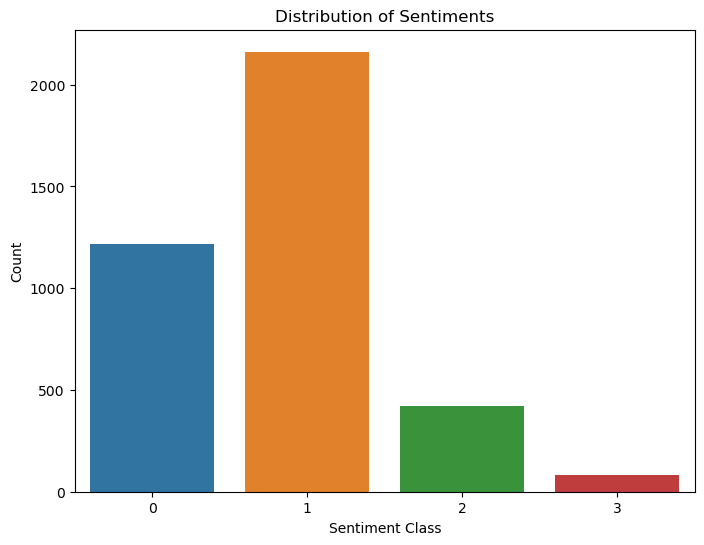

In [ ]:
# Plotting the count of each sentiment class
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=Appledf)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.show()

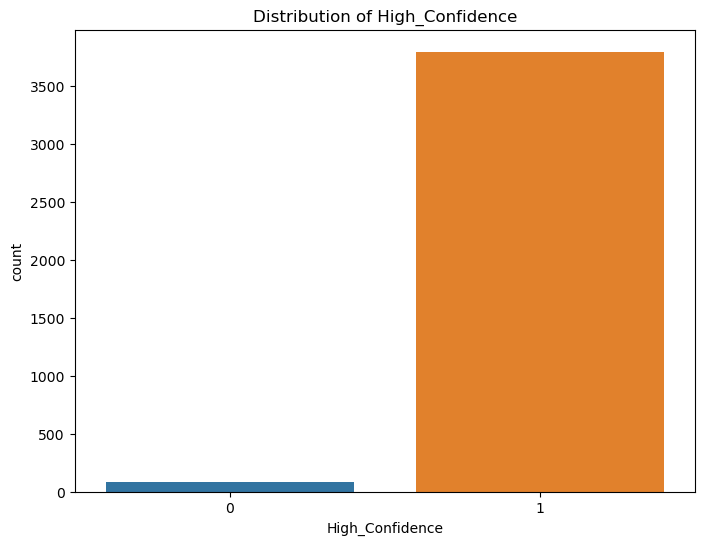

In [ ]:
# Feature Engineering

# Sentiment Confidence Feature
threshold = 0.5
Appledf['High_Confidence'] = np.where(Appledf['sentiment_confidence'] > threshold, 1, 0)

# Plotting the distribution of 'High_Confidence'
plt.figure(figsize=(8, 6))
sns.countplot(x='High_Confidence', data=Appledf)
plt.title('Distribution of High_Confidence')
plt.show()

In [ ]:
# Text Length
Appledf['text_Length'] = Appledf['text'].apply(len)
print("\nDataFrame with Text Length:")
display(Appledf[['text', 'text_Length']].head())


DataFrame with Text Length:


,text,text_Length
0,"[aapl, best, steve, jobs, emails, ever, http, ...",11
1,"[rt, jpdesloges, aapl, stock, mini, flash, cra...",14
2,"[cat, chews, apple, cords, applesnob]",5
3,"[agree, jimcramer, individualinvestor, trade, ...",11
4,"[nobody, expects, spanish, inquisition, aapl]",5


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    Appledf['Sentence_Embedding'].tolist(), Appledf['sentiment'], test_size=0.2, random_state=42)

In [ ]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


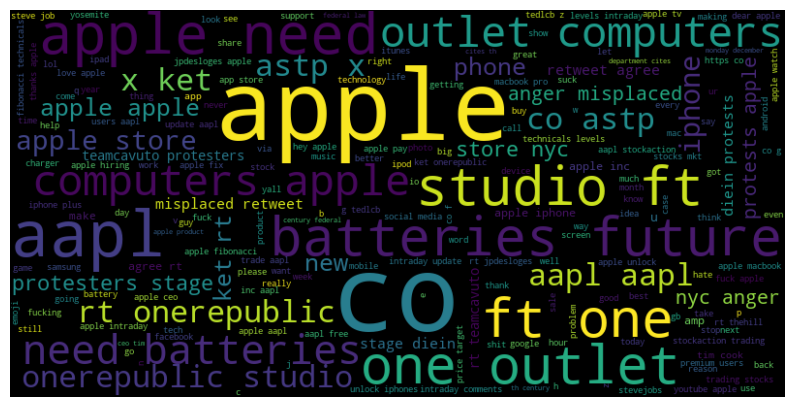

In [ ]:
# Visualization: Word Cloud
all_words = ' '.join([' '.join(text) for text in Appledf['text']])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

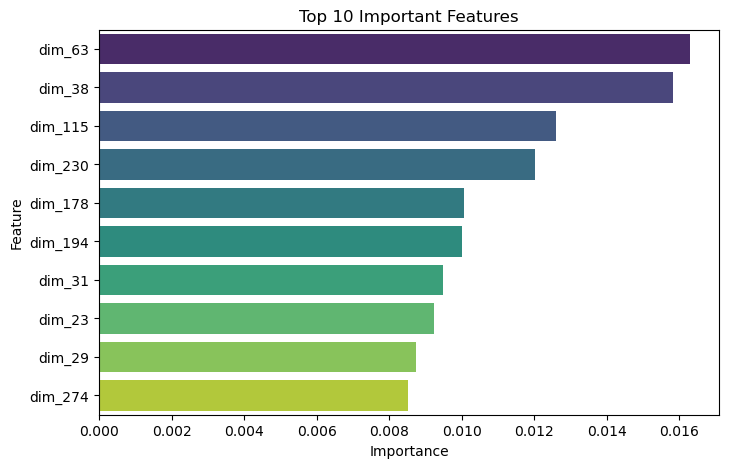

In [ ]:
# Visualization: Feature Importance
model = RandomForestClassifier()
model.fit(X_train, y_train)

X_train_array = np.array(X_train)

if hasattr(model, 'feature_importances_'):
    feature_names = ['dim_'+str(i) for i in range(X_train_array.shape[1])]
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': model.feature_importances_})
    top_features = feature_importance.nlargest(10, 'Importance')

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
    plt.title('Top 10 Important Features')
    plt.show()

# MODEL TRAINING AND SELECTION

In [ ]:
# Visualization: Feature Importance
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Predictions on Test Set
y_pred = model.predict(X_test)

#  Model Evaluation

In [ ]:
# Evaluation Metrics
print(f'\nAccuracy: {accuracy_score(y_test, y_pred)}\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy: 0.6825192802056556

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       240
           1       0.69      0.85      0.77       424
           2       0.64      0.09      0.16        99
           3       0.00      0.00      0.00        15

    accuracy                           0.68       778
   macro avg       0.50      0.40      0.40       778
weighted avg       0.66      0.68      0.64       778

Confusion Matrix:
[[160  79   1   0]
 [ 58 362   4   0]
 [ 25  65   9   0]
 [  0  15   0   0]]


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


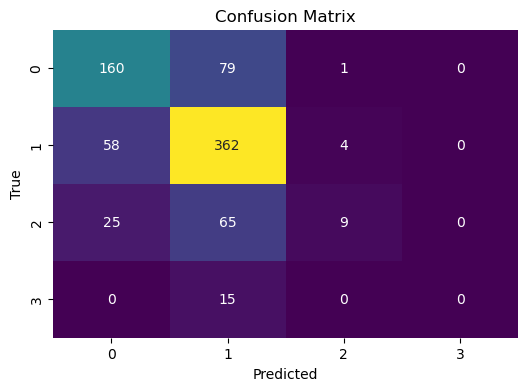

In [ ]:
# Set a custom color palette
colors = sns.color_palette("viridis", as_cmap=True)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap=colors, cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Assuming X_train is a list
X_train_array = np.array(X_train)

# Cross-Validation
cv_scores = cross_val_score(model, X_train_array, y_train, cv=5)
print(f'\nCross-validation scores: {cv_scores}')



Cross-validation scores: [0.69614148 0.68488746 0.72186495 0.68760064 0.6747182 ]


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np

# Example New Sentences
new_sentences = ["I love this product!", "The service was terrible.", "Neutral statement about something."]

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocess the new sentences consistently
new_sentences = [word_tokenize(sentence.lower()) for sentence in new_sentences]
new_sentences = [[lemmatizer.lemmatize(word) for word in sentence] for sentence in new_sentences]
print("\nProcessed New Sentences:")
print(new_sentences)

# Obtain word embeddings for new sentences
new_sentence_embeddings = [np.mean([nlp(word).vector for word in sentence], axis=0) for sentence in new_sentences]

# Predict sentiment for new sentences
new_predictions = model.predict(new_sentence_embeddings)

# Print the predicted sentiment for each new sentence
for sentence, prediction in zip(new_sentences, new_predictions):
    print(f"Original Sentence: {' '.join(sentence)} | Predicted Sentiment: {label_encoder.inverse_transform([prediction])[0]}")



Processed New Sentences:
[['i', 'love', 'this', 'product', '!'], ['the', 'service', 'wa', 'terrible', '.'], ['neutral', 'statement', 'about', 'something', '.']]
Original Sentence: i love this product ! | Predicted Sentiment: 1
Original Sentence: the service wa terrible . | Predicted Sentiment: 1
Original Sentence: neutral statement about something . | Predicted Sentiment: 1
